Logistic Regression Accuracy: 0.9473684210526315

Confusuin Matrix:
 [[40  2]
 [ 4 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Model results saved to: C:\Users\jeffr\principal_component_analysis_project\model_outputs\model_results.xlsx
Figure saved to: C:\Users\jeffr\principal_component_analysis_project\model_outputs\logistic_regression_decision_boundary_on_2d_pca.png


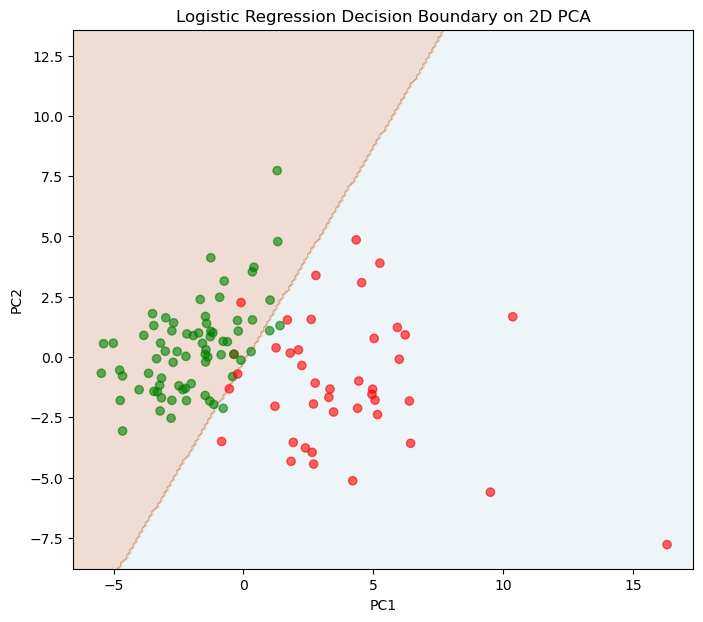

In [2]:
# Implement Logistics regression for prediction.

# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from pca_utils import save_pca_outputs
from pca_utils import save_figure_model
from pca_utils import save_model_result

# Step 2: Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')  # 0 =malignant, 1 = benign

# Step 3: Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Reduce dimensions to 2 PCA components
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Step 5: Split dataset into train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# step 6: Initialize and train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = logreg.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("\nConfusuin Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

save_model_result(
    accuracy=accuracy,
    confusion_matrix=conf_matrix,
    classification_report=report
)
    
# Step 9: Visualization of the decision boundary in 2D PCA space
import numpy as np

# Create a meshgrid
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# predict on meshgrid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)

plt.figure(figsize=(8,7))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
colors = ['red' if t==0 else 'green' for t in y_test]
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Logistic Regression Decision Boundary on 2D PCA')
fig = plt.gcf()
save_figure_model(fig, "logistic_regression_decision_boundary_on_2d_pca.png")
plt.show()
           